The Fraud Detection in Financial Transactions project aims to develop a highly accurate predictive model that identifies fraudulent activities within financial transactions. By analyzing patterns and features in transactional data, the model intends to flag potentially fraudulent transactions for further investigation. The goal is to equip financial institutions with a robust tool to proactively detect and prevent fraudulent activities, thereby enhancing security and minimizing financial losses.

## Import Library

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE



## Data Overview

In [51]:
df=pd.read_csv("fraud detection in credit card transactions.csv")

In [52]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [53]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [54]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [56]:
df.duplicated().sum()

1081

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
## Exploratory Data Analysis (EDA)

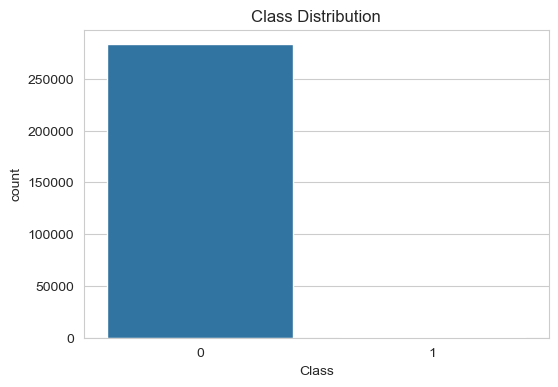

In [59]:

# Visualize the class distribution (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

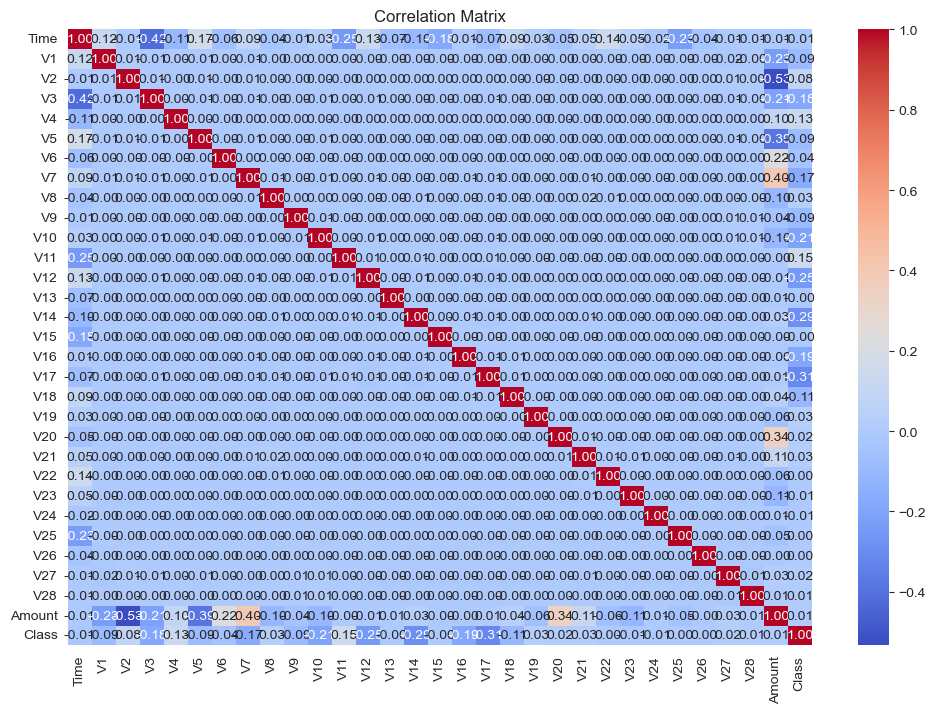

In [60]:

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

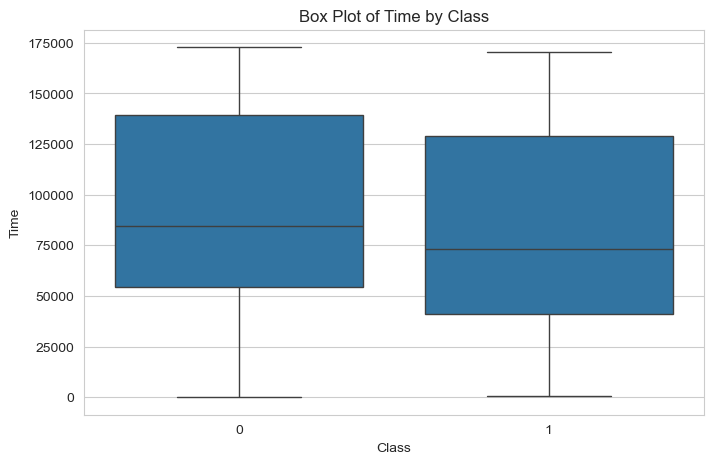

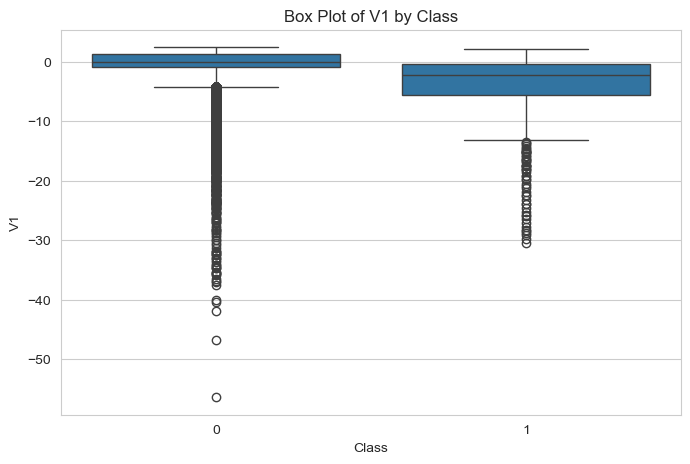

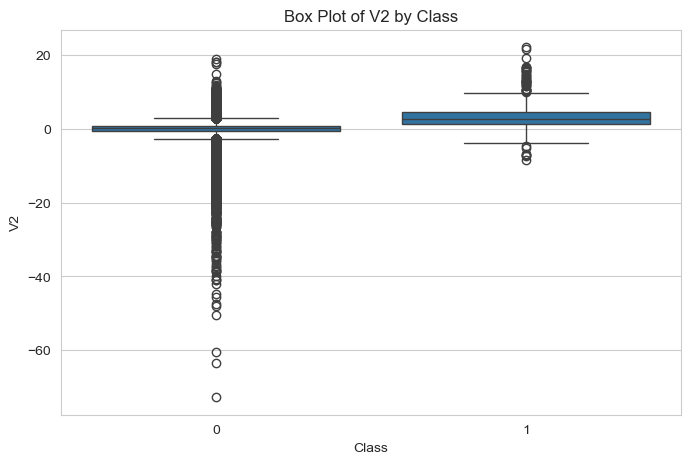

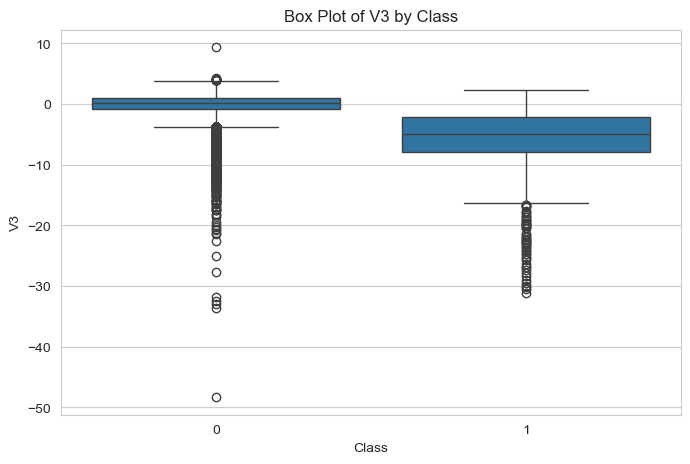

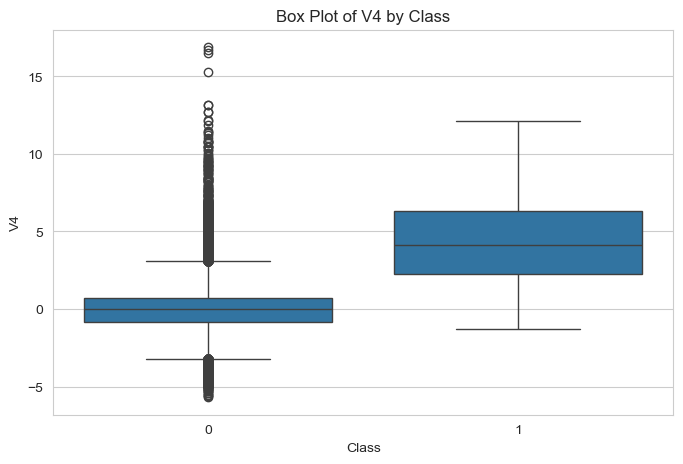

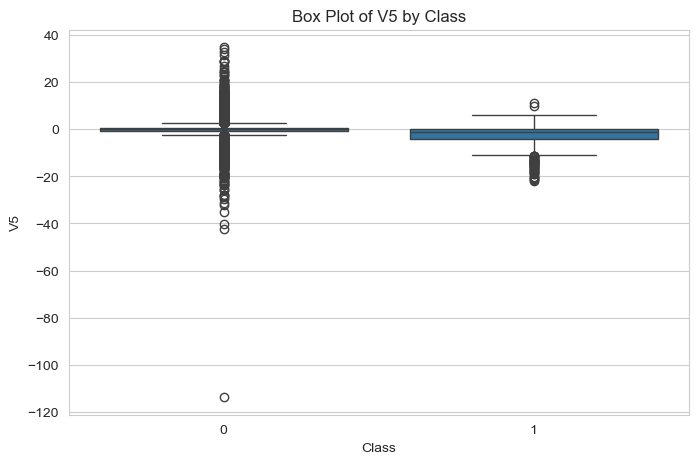

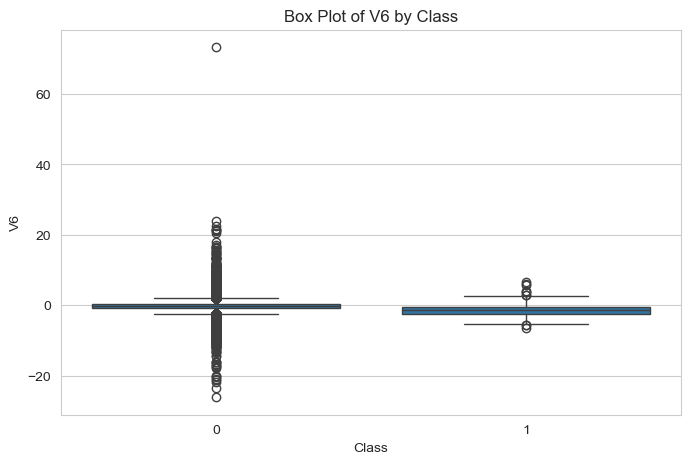

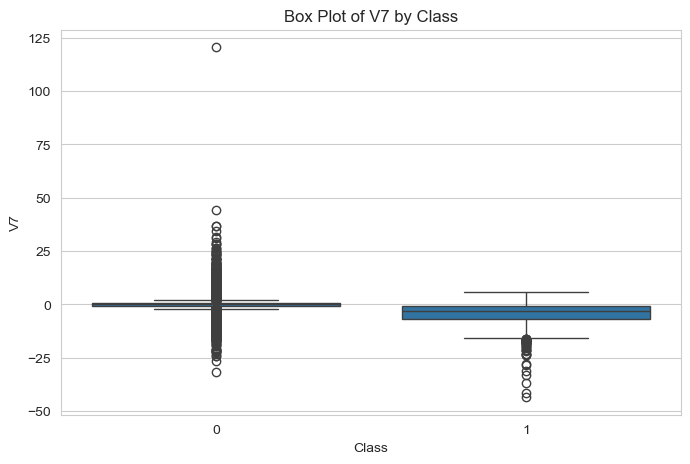

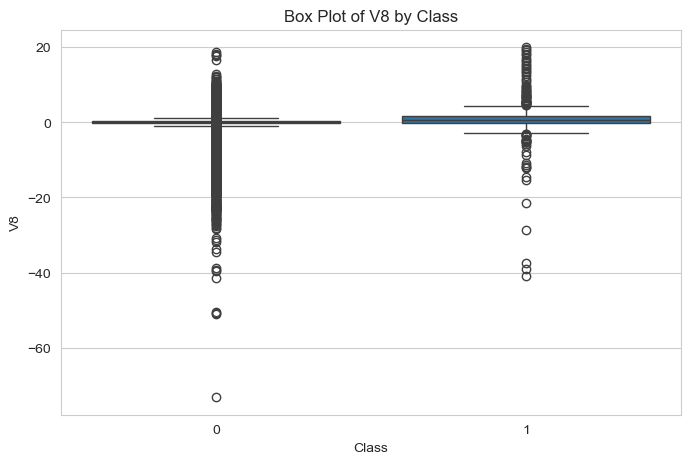

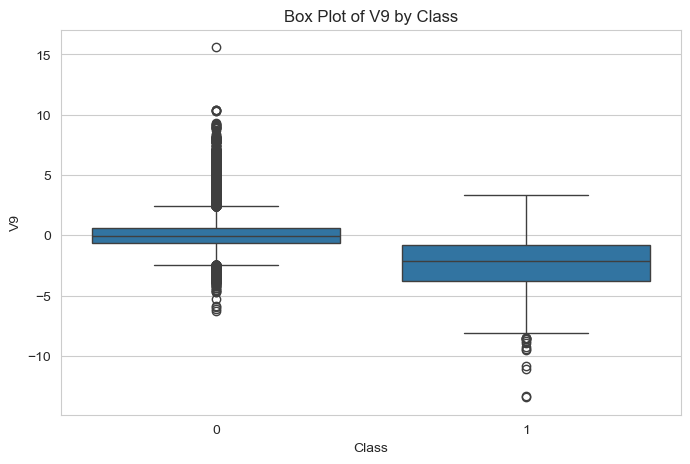

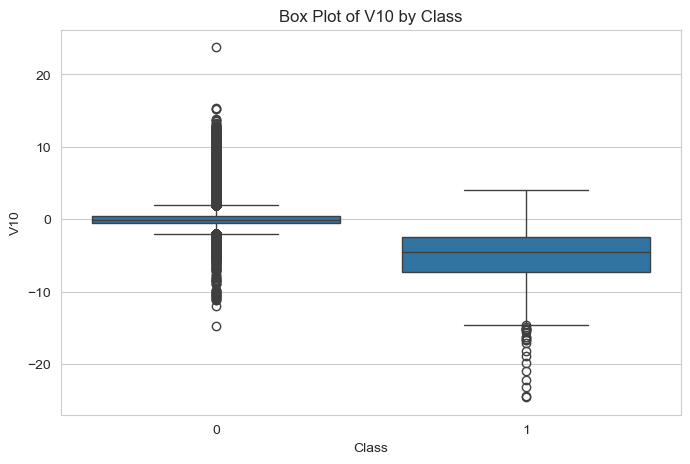

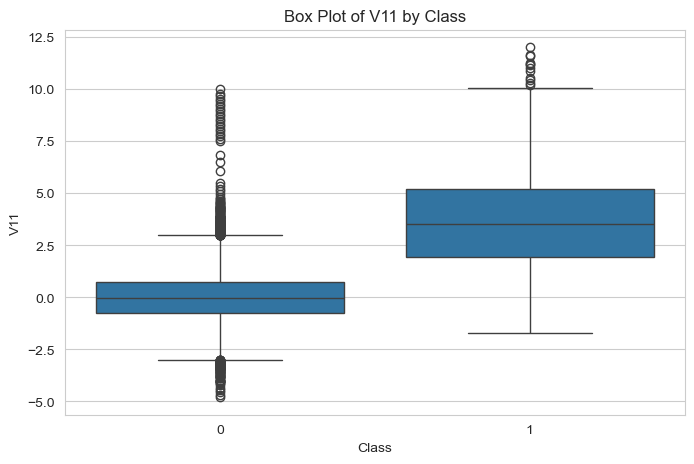

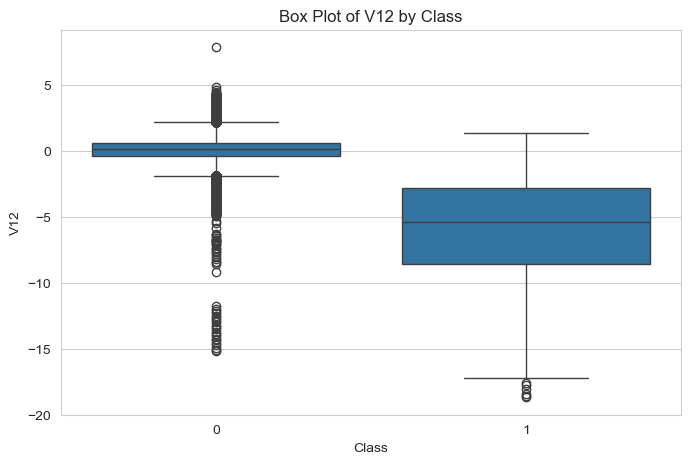

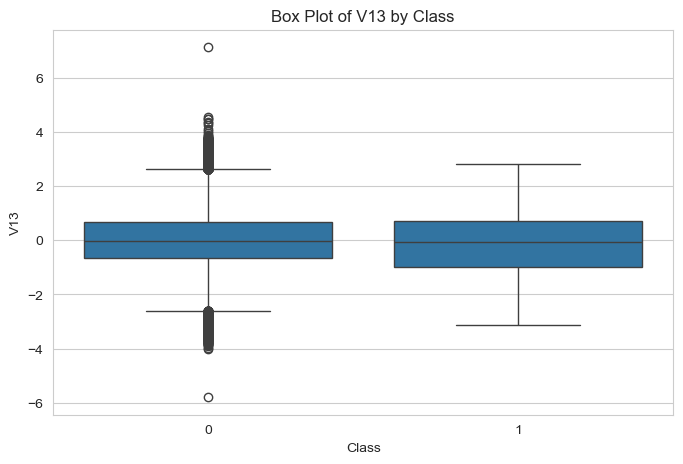

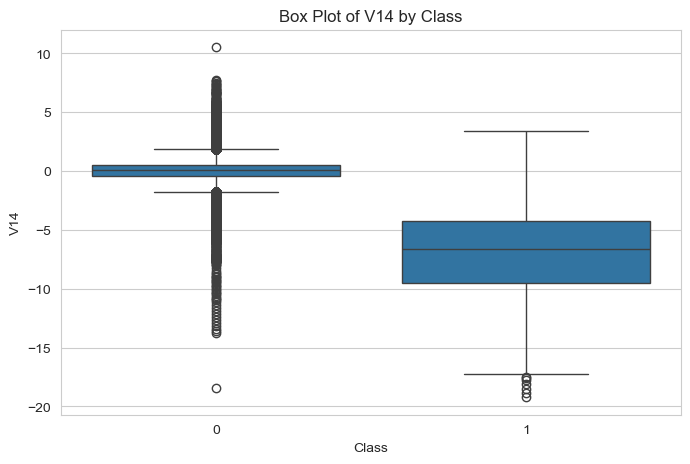

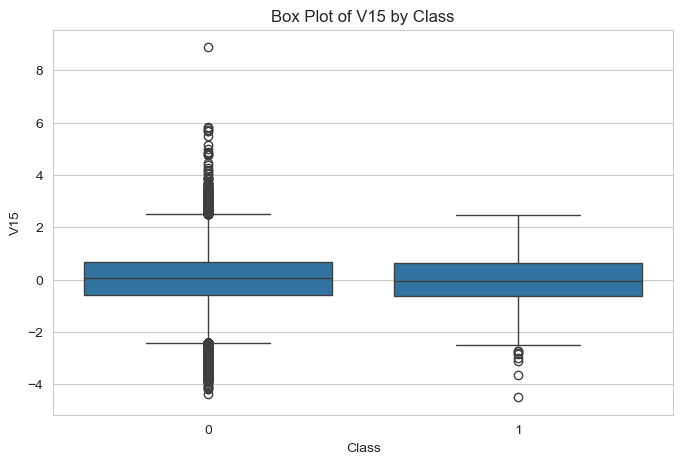

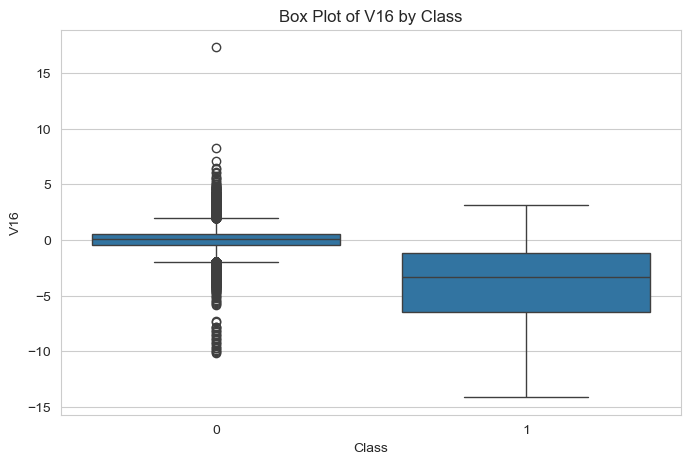

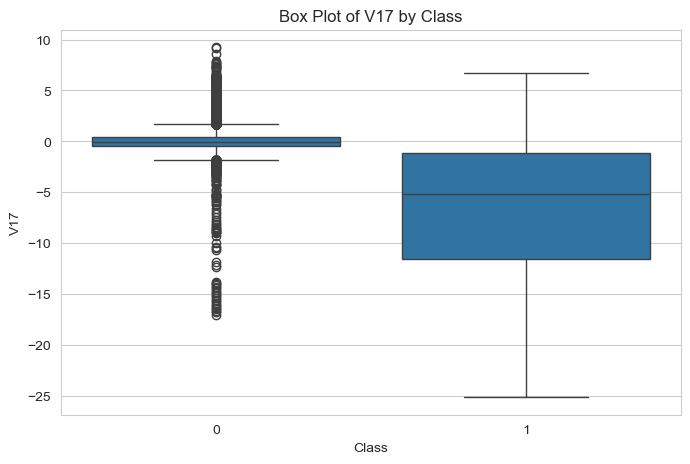

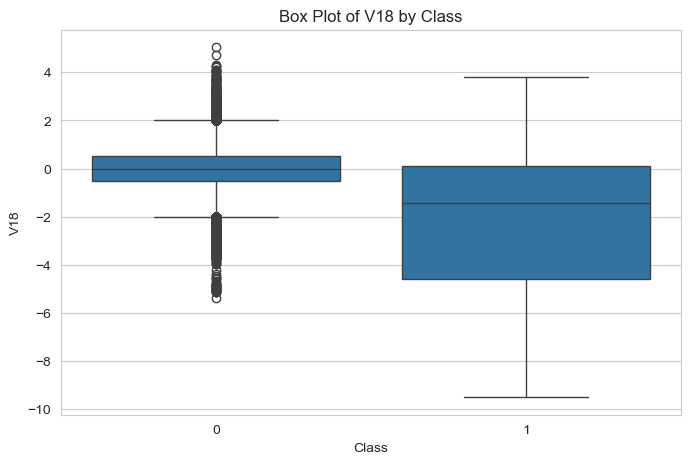

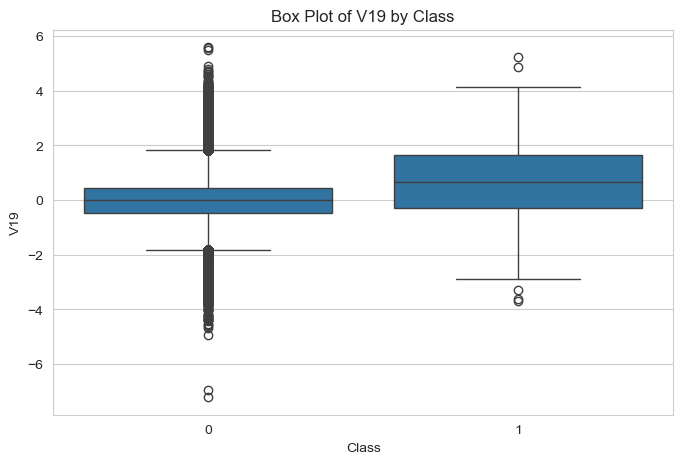

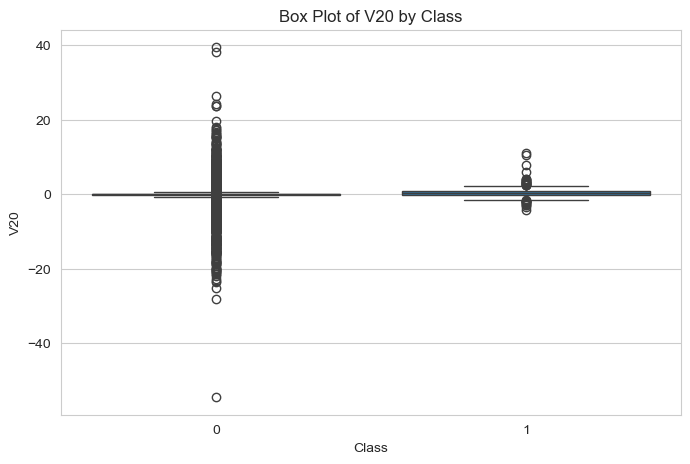

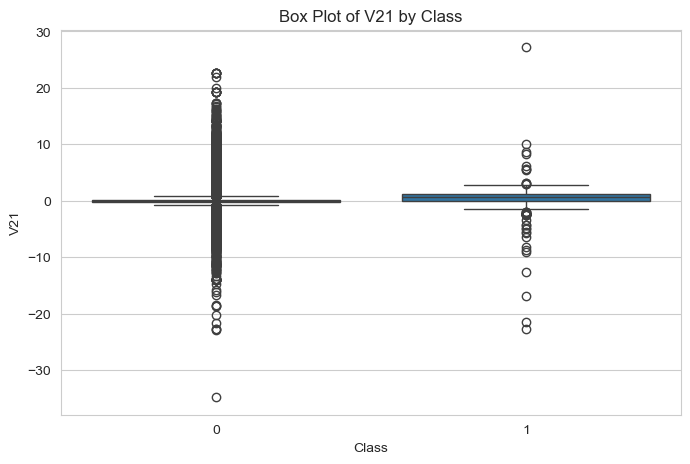

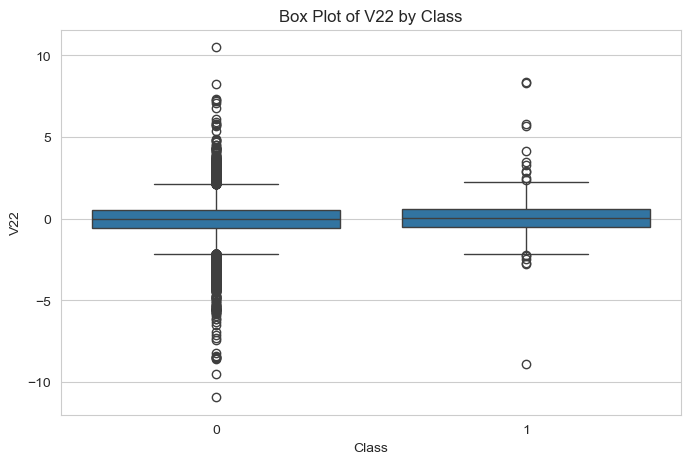

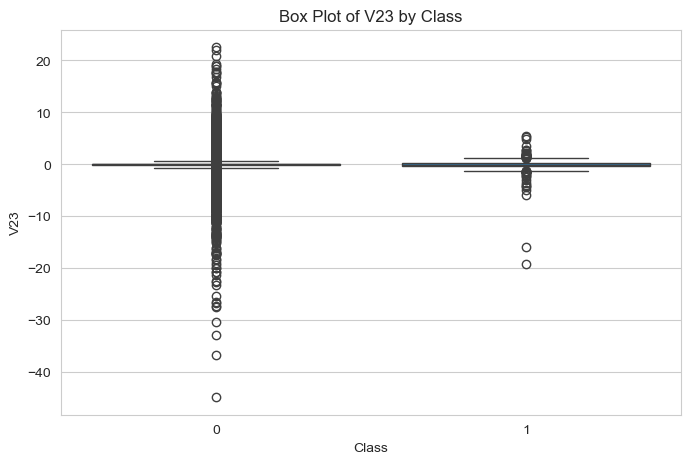

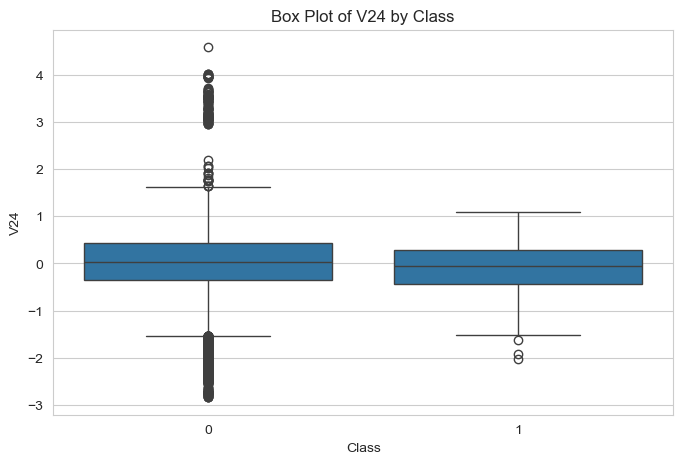

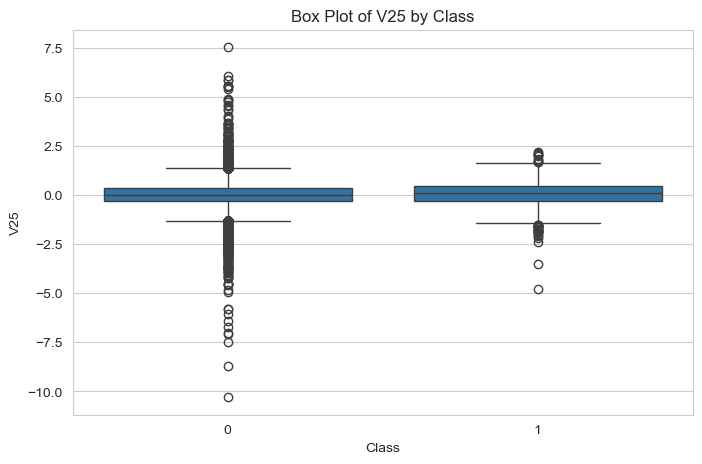

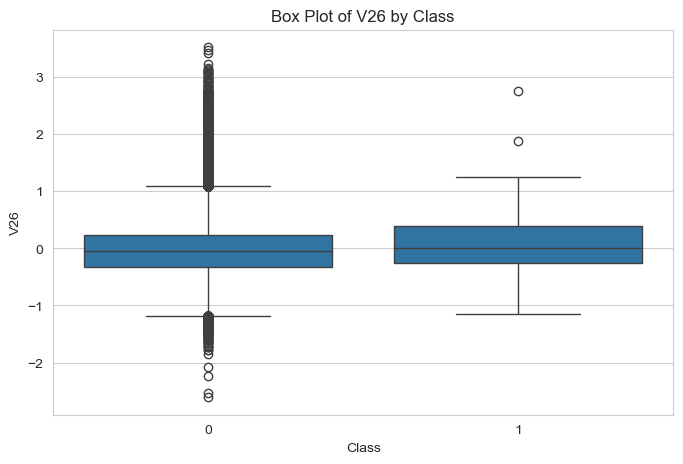

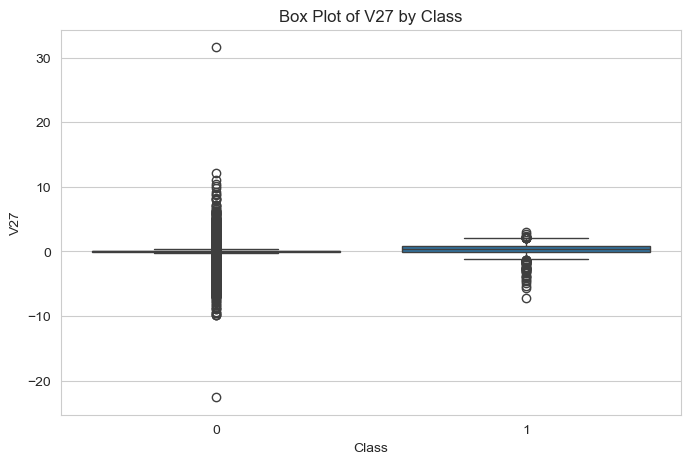

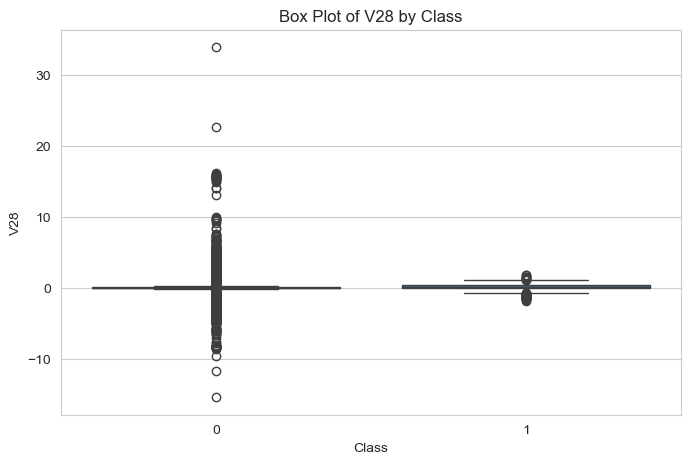

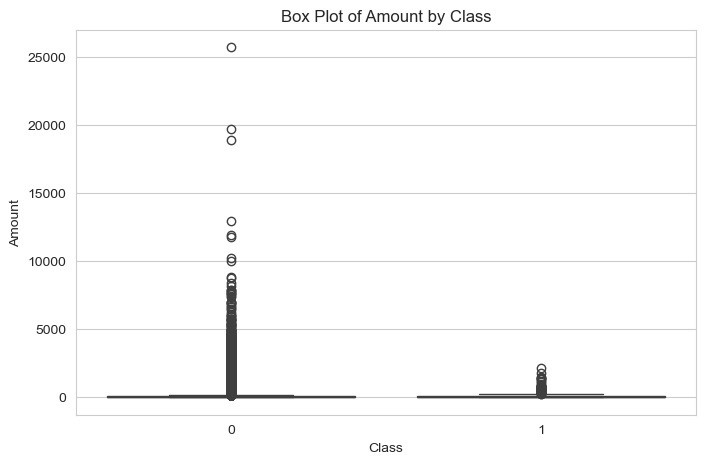

In [61]:
# Box plots for numerical features by class
num_features = df.columns[:-1]  # Exclude the 'Class' column
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Class')
    plt.show()

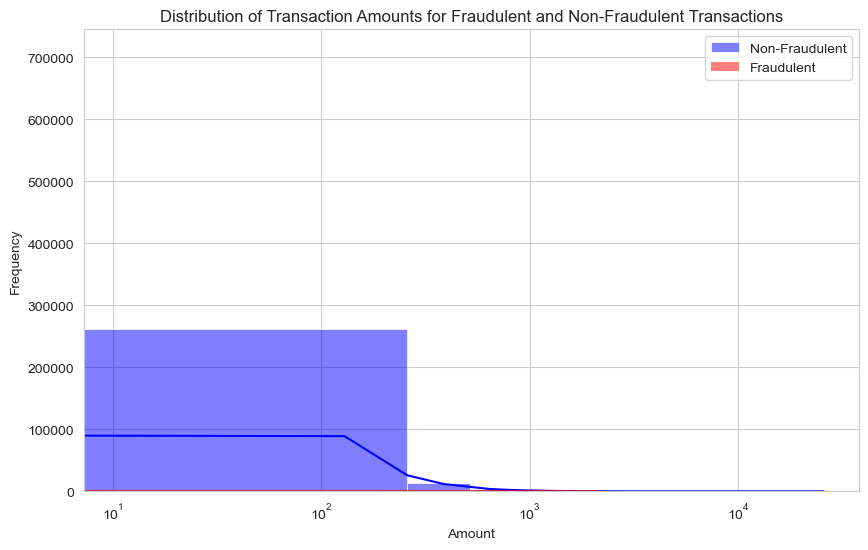

In [62]:

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the distribution of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10,6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, kde=True, color='blue', label='Non-Fraudulent')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, kde=True, color='red', label='Fraudulent')
plt.title('Distribution of Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xscale('log')
plt.legend()
plt.show()

In [63]:


# Assuming df is your DataFrame with the columns mentioned
# 'V1', 'V2', ..., 'Amount'

# Define the columns with outliers
columns_with_outliers = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the DataFrame
df_no_outliers = remove_outliers(df, columns_with_outliers)

# Now df_no_outliers contains the DataFrame with outliers removed


In [64]:
df_no_outliers.shape

(109832, 31)

In [65]:
df_no_outliers['normal_amount'] = StandardScaler().fit_transform(df_no_outliers['Amount'].values.reshape(-1,1))
df1 = df_no_outliers.drop(['Amount','Time'], axis=1)

In [66]:
X = df.loc[:,df.columns != 'Class']
y = df.loc[:,df.columns == 'Class']

In [67]:
# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [68]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [69]:
X_train.shape

(453204, 30)

In [70]:
X_test.shape

(113302, 30)

In [71]:
y_train.shape

(453204, 1)

In [72]:
y_test.shape

(113302, 1)

# Model

## Logistic Regession

In [73]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

D:\Anaconda\envs\tamil\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9701329191011633


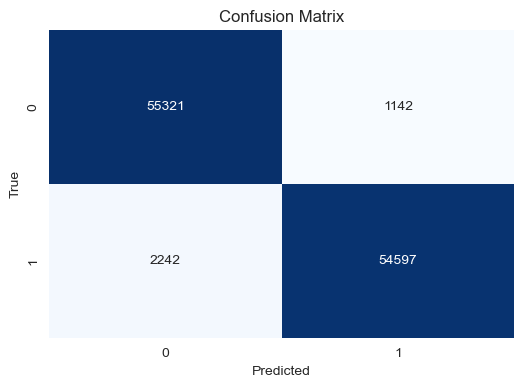

Accuracy: 0.9701


In [74]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

In [75]:
## Random Forest

In [76]:
# Train a Random Forest classifier on the balanced data
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

C:\Users\tamil\AppData\Local\Temp\ipykernel_19364\664562177.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [81]:
# Make predictions on the test set
y_pred_ra = rf_model.predict(X_test)

In [85]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_ra)
precision = precision_score(y_test, y_pred_ra)
recall = recall_score(y_test, y_pred_ra)
f1 = f1_score(y_test, y_pred_ra)

print(accuracy),
print(precision),
print(recall), 
print(f1)

0.9999029143351397
0.999806508355321
1.0
0.9999032448170009


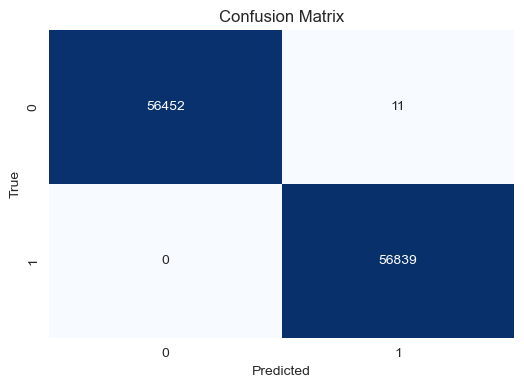

Accuracy: 0.9999


In [86]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_ra)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_ra)
print(f'Accuracy: {accuracy:.4f}')

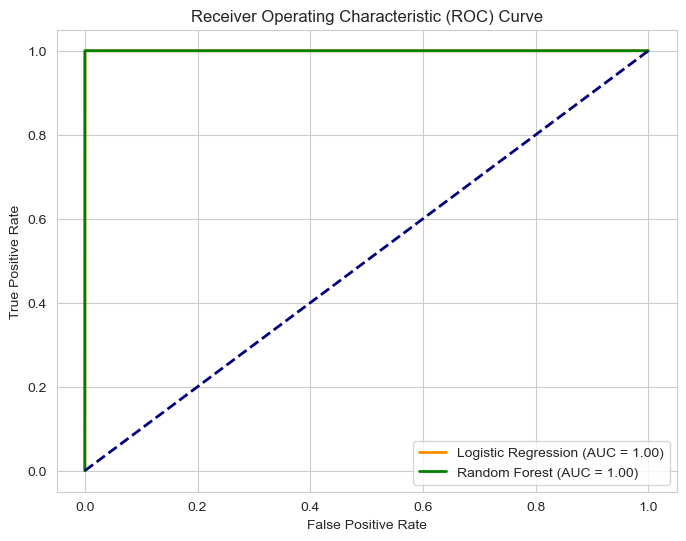

In [88]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_ra)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

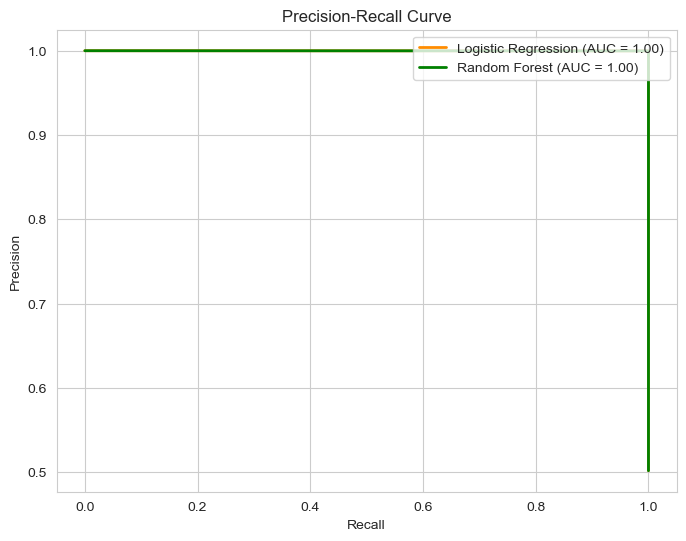

In [90]:
from sklearn.metrics import precision_recall_curve, auc

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred)
pr_auc_lr = auc(recall_lr, precision_lr)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_ra)
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()